In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

In [54]:
df = pd.read_csv('../downloaded_from_mendeley/weaving_rejection_dataset.csv')

In [55]:
df.head()

,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count,epi,ppi
0,40+40/2/40/110x80,31300,6.0,38286.9360,12.5,TOTAL,33297.872340,34797.651100,27646.0,285,double_40,80,110,80
1,40x40/110x90,10450,7.0,13057.5840,14.5,TOTAL,11236.559140,12017.350430,11019.0,39,40,40,110,90
2,40x40/110x80,900,11.5,1902.8640,12.5,TOTAL,1016.949153,1062.753843,1528.0,0,40,40,110,80
3,40x40/130x80,8000,8.0,10093.9280,14.0,TOTAL,8695.652174,9245.815159,8944.0,58,40,40,130,80
4,50x50/140x70,3500,8.1,69146.1408,9.1,TOTAL,3808.487486,3831.158751,59367.0,1043,50,50,140,70


In [56]:
df['weft_count_cat'] = df['weft_count'].apply(lambda x: str(x))
df['epi_cat'] = df['epi'].apply(lambda x: str(x))
df['ppi_cat'] = df['ppi'].apply(lambda x: str(x))

In [57]:
df= df[['Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 'Shrink_allow', 'Req_grey_fabric', 
    'Req_beam_length(yds)', 'Total_Pdn(yds)',
       'Rejection', 'warp_count',  'weft_count_cat', 'ppi_cat']]

In [58]:
df.head()

,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),Shrink_allow,Req_grey_fabric,Req_beam_length(yds),Total_Pdn(yds),Rejection,warp_count,weft_count_cat,ppi_cat
0,31300,6.0,38286.9360,12.5,33297.872340,34797.651100,27646.0,285,double_40,80,80
1,10450,7.0,13057.5840,14.5,11236.559140,12017.350430,11019.0,39,40,40,90
2,900,11.5,1902.8640,12.5,1016.949153,1062.753843,1528.0,0,40,40,80
3,8000,8.0,10093.9280,14.0,8695.652174,9245.815159,8944.0,58,40,40,80
4,3500,8.1,69146.1408,9.1,3808.487486,3831.158751,59367.0,1043,50,50,70


In [59]:
X = df.copy()
y = X.pop('Rejection')

In [60]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [61]:
cat_cols = X_train.select_dtypes('O').columns
num_cols = X_train.select_dtypes(exclude='O').columns

In [62]:
colm_trans = ColumnTransformer(transformers=[
    ('num_process', MinMaxScaler(), num_cols),
    ('cat_cols', OneHotEncoder(handle_unknown='ignore'), cat_cols),
])


In [63]:
X_train_trans = pd.DataFrame(colm_trans.fit_transform(X_train).toarray())
X_test_trans = pd.DataFrame(colm_trans.transform(X_test).toarray())
X_val_trans = pd.DataFrame(colm_trans.transform(X_val).toarray())

In [64]:
X_train_trans.index = X_train.index
X_test_trans.index = X_test.index
X_val_trans.index = X_val.index

In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
import keras
def scheduler(epochs, lr):
    if epochs<10:
        return lr
    else:
        return np.round(lr*tf.math.exp(-0.1), 4)
callback_1 = keras.callbacks.LearningRateScheduler(scheduler)
callback_2 = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
callback_list =[callback_1, callback_2]

In [67]:
X_train.shape, X_train_trans.shape, len(y_train)

((12304, 10), (12304, 50), 12304)

In [41]:
162/2

81.0

In [18]:
#learnig rate round up 3
nn_model_inchuan_2 = Sequential()
nn_model_inchuan_2.add(Dense(52, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_inchuan_2.add(Dense(81, kernel_initializer='normal', activation='relu' ))
nn_model_inchuan_2.add(Dense(81, kernel_initializer='normal', activation='relu' ))
nn_model_inchuan_2.add(Dense(26, kernel_initializer='normal', activation='relu' ))
# nn_model_inchuan_2.add(Dense(54, kernel_initializer='normal', activation='relu' ))
nn_model_inchuan_2.add(Dense(1, kernel_initializer='normal', activation='linear' ))

/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
nn_model_inchuan_2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [20]:
nn_model_inchuan_2.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [21]:
h = nn_model_inchuan_2.history.history

In [22]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


In [23]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.9402302495237215

<Axes: >

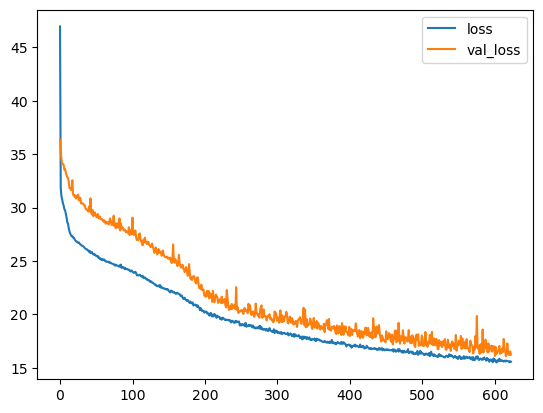

In [24]:
# layer 4, 52-81-81-26, lr 4, epoch 1000
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [25]:
162/4

40.5

In [17]:

nn_model_6 = Sequential()
nn_model_6.add(Dense(52, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_6.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_6.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_6.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_6.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_6.add(Dense(26, kernel_initializer='normal', activation='relu' ))
nn_model_6.add(Dense(1, kernel_initializer='normal', activation='linear' ))

/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
nn_model_6.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [19]:
nn_model_6.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [20]:
h = nn_model_6.history.history

In [21]:
y_p= nn_model_6.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.9387512162430287

<Axes: >

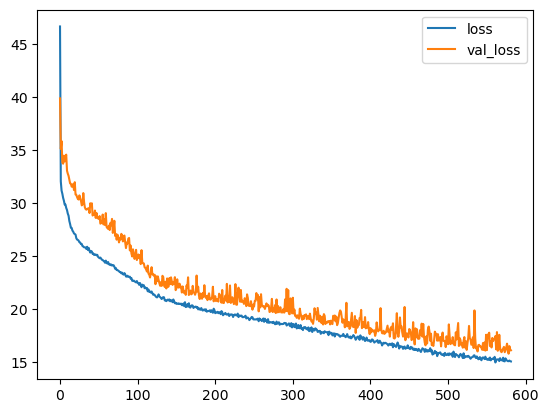

In [23]:
# layer 4, 52-40-40-40-40-26, lr 4, epoch 1000
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [ ]:
#nn_model_8

In [68]:

nn_model_8 = Sequential()
nn_model_8.add(Dense(51,  kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_8.add(Dense(102, kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(204, kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(408, kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(102, kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(51,  kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(20,  kernel_initializer='normal', activation='relu' ))
nn_model_8.add(Dense(1,   kernel_initializer='normal', activation='linear' ))

/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
nn_model_8.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [70]:
nn_model_8.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [71]:
h = nn_model_8.history.history

<Axes: >

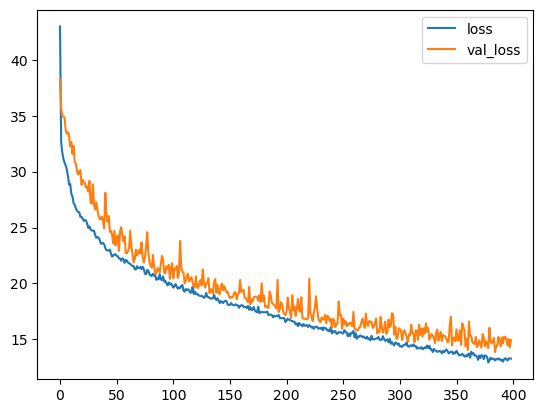

In [72]:
# layer 4, 52-40-40-40-40-26, lr 4, epoch 1000
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [73]:
y_p= nn_model_8.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [74]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.9536197677651704

In [17]:

nn_model_0 = Sequential()
nn_model_0.add(Dense(52, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_0.add(Dense(162, kernel_initializer='normal', activation='relu' ))
nn_model_0.add(Dense(81, kernel_initializer='normal', activation='relu' ))
# nn_model_6.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_0.add(Dense(40, kernel_initializer='normal', activation='relu' ))
nn_model_0.add(Dense(20, kernel_initializer='normal', activation='relu' ))
nn_model_0.add(Dense(1, kernel_initializer='normal', activation='linear' ))

/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
nn_model_0.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [19]:
nn_model_0.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [20]:
y_p= nn_model_0.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.9358524606380515

In [23]:
h = nn_model_0.history.history

In [17]:

nn_model_1 = Sequential()
nn_model_1.add(Dense(52, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_1.add(Dense(102, kernel_initializer='normal', activation='relu' ))
nn_model_1.add(Dense(204, kernel_initializer='normal', activation='relu' ))
nn_model_1.add(Dense(102, kernel_initializer='normal', activation='relu' ))
nn_model_1.add(Dense(40, kernel_initializer='normal', activation='relu' ))
# nn_model_1.add(Dense(20, kernel_initializer='normal', activation='relu' ))
nn_model_1.add(Dense(1, kernel_initializer='normal', activation='linear' ))

In [18]:
nn_model_1.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [19]:
nn_model_1.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [20]:
h = nn_model_1.history.history

In [21]:
y_p= nn_model_1.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.960582133222162

<Axes: >

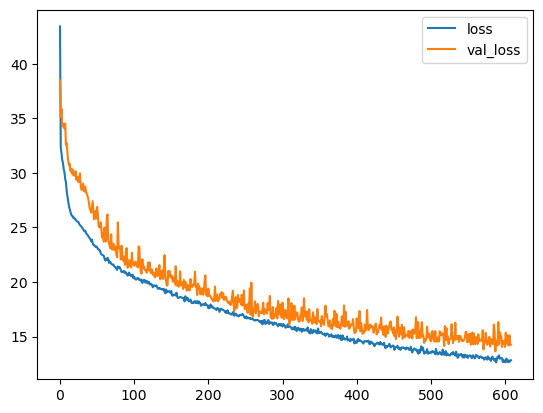

In [23]:
# layer 5, 52-102-204-102-40, lr 4, epoch 1000
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [21]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
r2_score(y_val, y_p) #epoch 1200, lr = 4

0.8751558949684922

<Axes: >

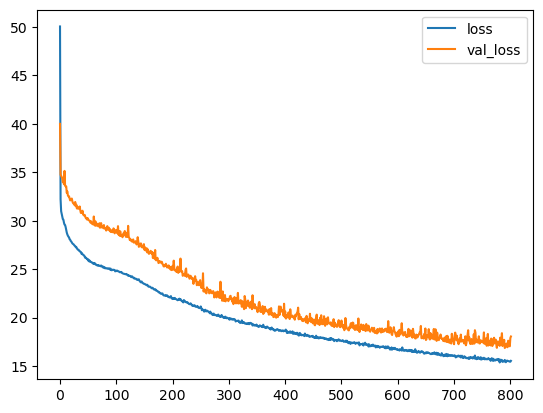

In [23]:
#lr 4, epoch 1200
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [19]:
h = nn_model_inchuan_2.history.history

In [20]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
r2_score(y_val, y_p) #epoch 1500, lr = 4

0.8702131809650464

<Axes: >

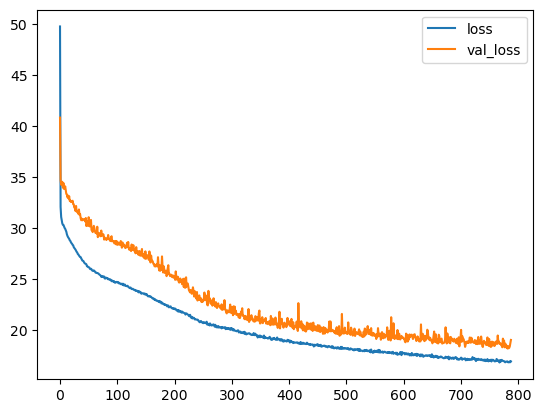

In [22]:
#lr 4, epoch 1500
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [24]:
X_train_trans.shape

(12304, 50)

In [42]:

nn_model_7 = Sequential()
nn_model_7.add(Dense(51, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu' ))
nn_model_7.add(Dense(100, kernel_initializer='normal', activation='relu' ))
nn_model_7.add(Dense(200, kernel_initializer='normal', activation='relu' ))
nn_model_7.add(Dense(300, kernel_initializer='normal', activation='relu' ))
nn_model_7.add(Dense(150, kernel_initializer='normal', activation='relu' ))
nn_model_7.add(Dense(75, kernel_initializer='normal', activation='relu' ))
nn_model_7.add(Dense(1, kernel_initializer='normal', activation='linear' ))

/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
nn_model_7.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [44]:
nn_model_7.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=1000, 
                     callbacks= callback_list, verbose=0  )

In [45]:
h = nn_model_7.history.history

In [46]:
y_p= nn_model_7.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [47]:
r2_score(y_val, y_p) #epoch 1000, lr = 4

0.9462534596764312

<Axes: >

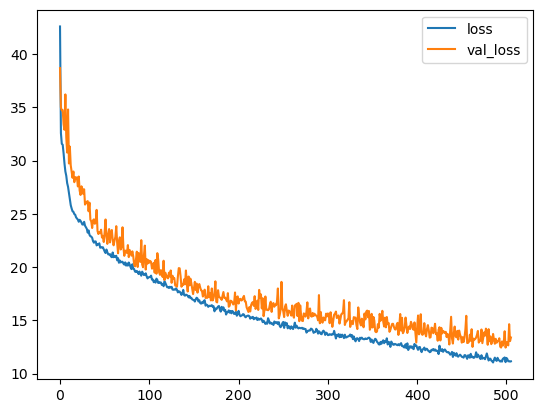

In [50]:
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [51]:
nn_model_7.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 51)             │         2,601 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │        60,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,558 (1.66 MB)

 Trainable params: 144,852 (565.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,706 (1.11 MB)

In [21]:
r2_score(y_val, y_p) #epoch 1500, lr = 5

0.7691717966986862

<Axes: >

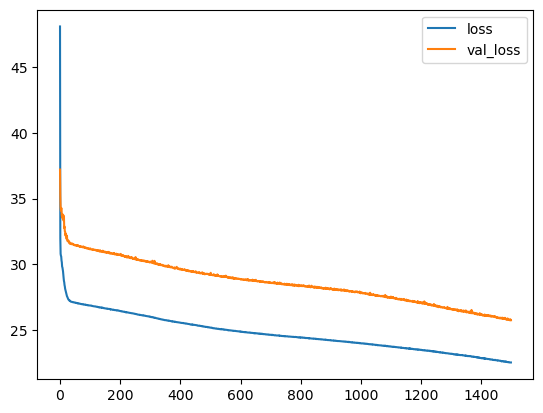

In [22]:
#lr 5, epoch 1500
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [19]:
h = nn_model_inchuan_2.history.history

In [20]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
r2_score(y_val, y_p) #epoch 1000

0.9368752604322597

<Axes: >

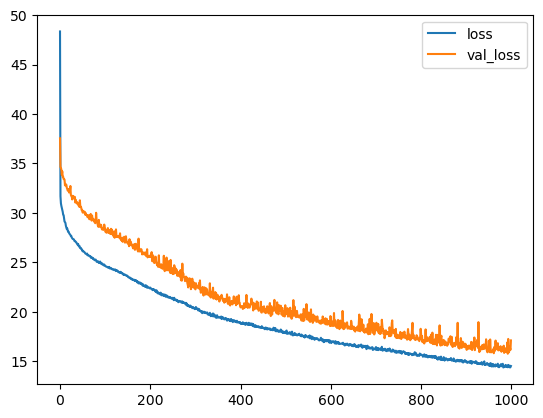

In [22]:
#lr 4, epoch 1000
pd.DataFrame(h)[['loss', 'val_loss']].plot()

<Axes: >

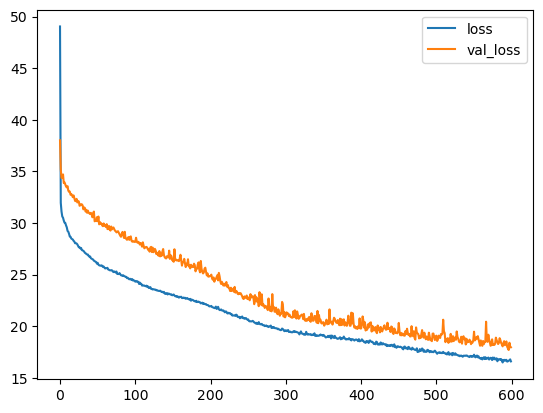

In [20]:
#lr 4, epoch 600
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [21]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
r2_score(y_val, y_p) #epoch 600

0.8912230317107543

<Axes: >

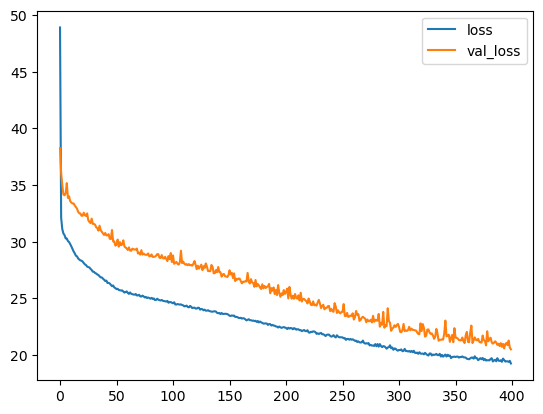

In [23]:
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [20]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
r2_score(y_val, y_p) #epoch 400

0.8476522947909549

<Axes: >

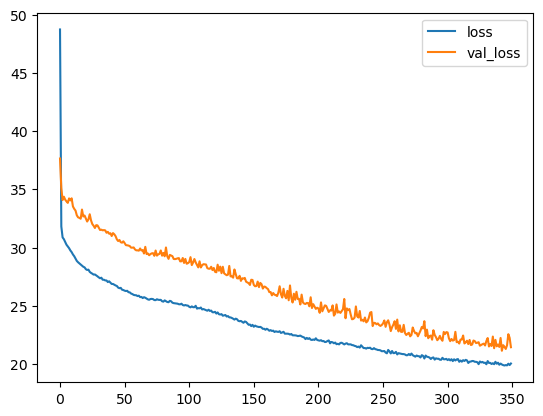

In [20]:
#epoch=350
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [21]:
y_p= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
r2_score(y_val, y_p) #epoch 350

0.824122976693338

In [ ]:
###########_____________________________##########################################

<Axes: >

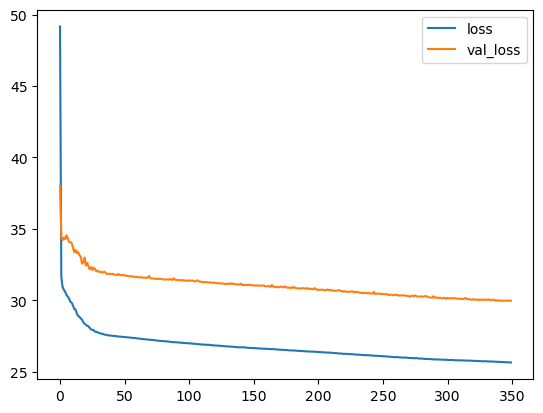

In [28]:
# lr = 5
pd.DataFrame(h)[['loss', 'val_loss']].plot()

In [29]:
y_= nn_model_inchuan_2.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
r2_score(y_, y_val)

0.3588221039801909

In [26]:
hh = nn_model_inchuan_2.history.history

<Axes: >

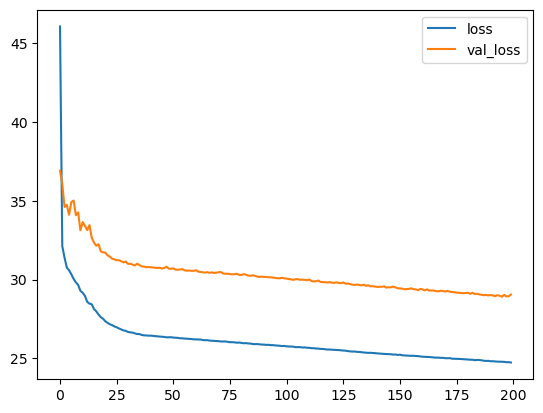

In [27]:
# 4 layrs lr 5
pd.DataFrame(hh)[['loss', 'val_loss']].plot()

<Axes: >

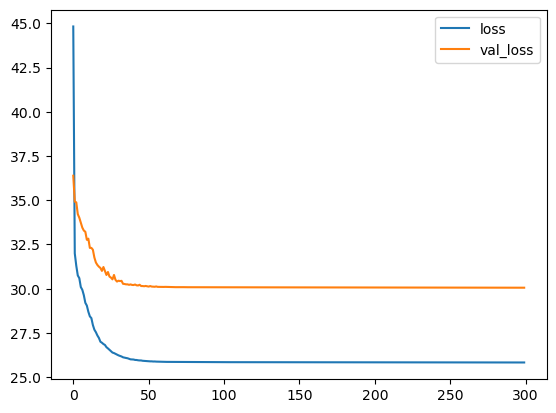

In [27]:
#4 layrs lr 7
pd.DataFrame(hh)[['loss', 'val_loss']].plot()

In [28]:
y_pred_4lr = nn_model_inchuan_2.predict(X_val_trans)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
r2_score(y_val, y_pred_4lr)

0.7137230973925885

In [26]:
hh = nn_model_inchuan_2.history.history

<Axes: >

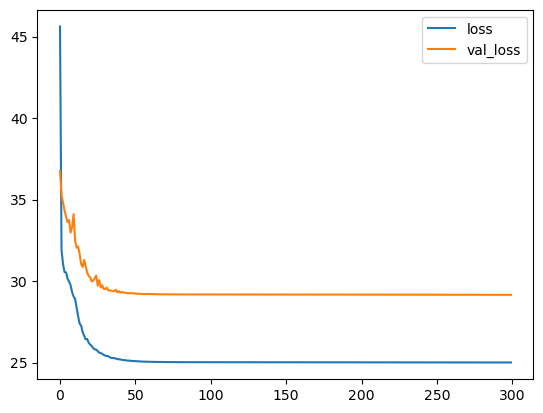

In [27]:
# lr 7 5 layers
pd.DataFrame(hh)[['loss', 'val_loss']].plot()

In [28]:
y_pred_5lr = nn_model_inchuan_2.predict(X_val_trans)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [30]:
r2_score(y_val, y_pred_5lr)

0.7149204675411092

<Axes: >

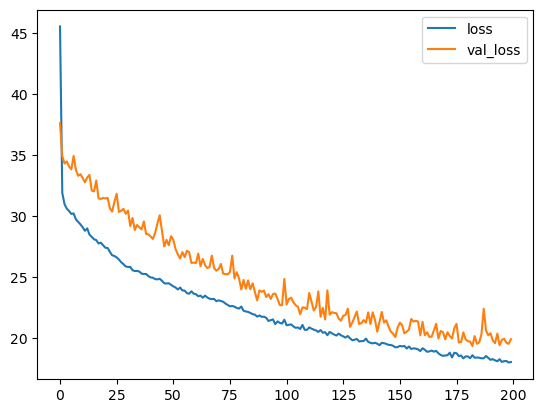

In [20]:
#lr 3 
pd.DataFrame(hh)[['loss', 'val_loss']].plot()

<Axes: >

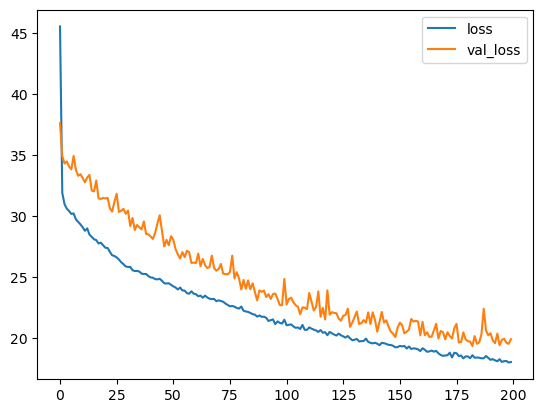

In [21]:
pd.DataFrame(hh)[['loss', 'val_loss']].plot()

In [22]:
y_pred_ = nn_model_inchuan_2.predict(X_val_trans)


97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_val, y_pred_)

0.8540375607771594

In [21]:
import keras
def scheduler(epochs, lr):
    if epochs<10:
        return lr
    else:
        return np.round(lr*tf.math.exp(-0.1), 3)
callback_1 = keras.callbacks.LearningRateScheduler(scheduler)
callback_2 = keras.callbacks.EarlyStopping(monitor='loss', patience=20)
callback_list =[callback_1, callback_2]

In [22]:
nn_model_jinchuan_2_layers = Sequential()
nn_model_jinchuan_2_layers.add(Dense(51, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu'))
nn_model_jinchuan_2_layers.add(Dense(81, activation='relu', kernel_initializer='normal'  ))
nn_model_jinchuan_2_layers.add(Dense(81, activation='relu', kernel_initializer='normal'  ))
nn_model_jinchuan_2_layers.add(Dense(1, activation='linear',  kernel_initializer= 'normal'  ))


/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
nn_model_jinchuan_2_layers.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [24]:
nn_model_jinchuan_2_layers.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test),
                              epochs=200, callbacks=callback_list, batch_size=30, verbose=0)

<Axes: >

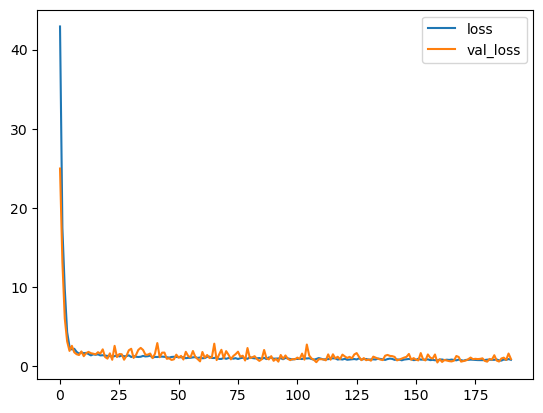

In [25]:
# lr = round up 3 decimal 
pd.DataFrame(nn_model_jinchuan_2_layers.history.history)[['loss','val_loss']].plot()

<Axes: >

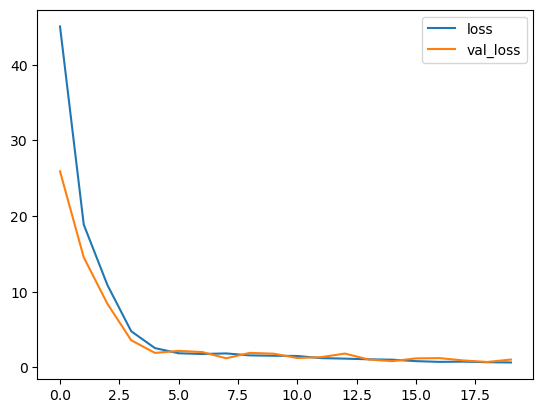

In [44]:
#lr round up 7 decimal
pd.DataFrame(nn_model_jinchuan_2_layers.history.history)[['loss','val_loss']].plot()

In [45]:
y_pred_2_h_layers = nn_model_jinchuan_2_layers.predict(X_val_trans)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [46]:
r2_score(y_val, y_pred_2_h_layers)

0.9997151775821183

In [48]:
162/3

54.0

## 3 hidden layers

In [16]:
nn_model_jinchuan_3_layers = Sequential()
nn_model_jinchuan_3_layers.add(Dense(51, kernel_initializer='normal', input_dim=X_train_trans.shape[1], activation='relu'))
nn_model_jinchuan_3_layers.add(Dense(54, activation='relu', kernel_initializer='normal'  ))
nn_model_jinchuan_3_layers.add(Dense(54, activation='relu', kernel_initializer='normal'  ))
nn_model_jinchuan_3_layers.add(Dense(54, activation='relu', kernel_initializer='normal'  ))
nn_model_jinchuan_3_layers.add(Dense(1, activation='linear',  kernel_initializer= 'normal'  ))


/home/ahiyan-linux/miniconda3/lib/python3.11/site-packages/keras/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
nn_model_jinchuan_3_layers.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [18]:
nn_model_jinchuan_3_layers.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=200, 
                               callbacks= callback_list, verbose=0  )

<Axes: >

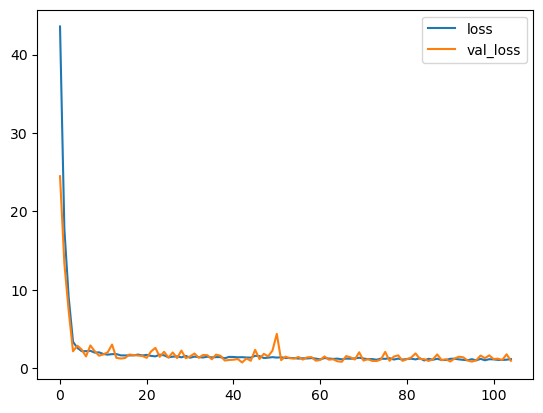

In [19]:
#lr 3 decimal
pd.DataFrame(nn_model_jinchuan_3_layers.history.history)[['loss', 'val_loss']].plot()

<Axes: >

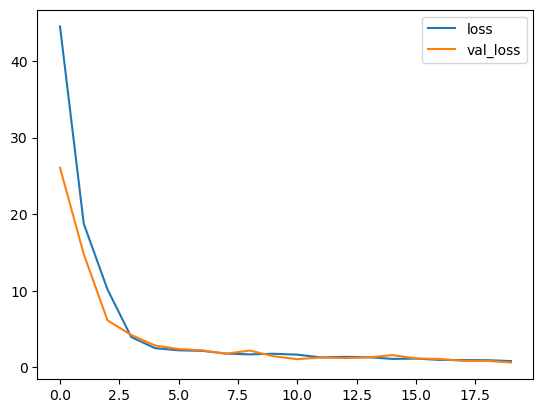

In [54]:
pd.DataFrame(nn_model_jinchuan_3_layers.history.history)[['loss', 'val_loss']].plot()

In [100]:
nn_model_jinchuan = Sequential()
nn_model_jinchuan.add(Dense(51, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu' ))
nn_model_jinchuan.add(Dense(162, kernel_initializer='normal', activation='relu' ))
# nn_model_inchuan_2.add(Dense(162, kernel_initializer='normal', activation='relu' ))
nn_model_jinchuan.add(Dense(1, kernel_initializer='normal', activation='linear' ))

In [101]:
# nn_model_inchuan_2.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
nn_model_jinchuan.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'] )

In [106]:
nn_model_jinchuan.fit(X_train_trans, y_train, validation_data=(X_test_trans, y_test), epochs=200, callbacks= callback_list )

Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 51)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 51), dtype=float32)
  • training=True
  • mask=None

In [103]:
# nn_model_jinchuan.fit(X_train_trans, y_train, batch_size=30, epochs=200, 
#                       validation_data=(X_test_trans, y_test),callbacks=callback_list  )

Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_26" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 51)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 51), dtype=float32)
  • training=True
  • mask=None